|名称|含义|
| : | : |
|id | ad identifier
|click | 1是点击 0/1 for non-click/click
|hour | 时间, YYMMDDHH, so 14091123 means 2014年09月11号23:00 UTC.
|C1 | 未知分类变量 anonymized categorical variable
|banner_pos|标语,横幅
|site_id|网站ID号
|site_domain|网站 域?
|site_category|网站类别
|app_id|appID号
|app_domain|应用 域?
|app_category|应用类别
|device_id|设备ID号
|device_ip|设备ip地址
|device_model|设备型号, 如iphone5/iphone4
|device_type|设备类型, 如智能手机/平板电脑
|device_conn_type|连接设备类型
|C14-C21|未知分类变量 anonymized categorical variables

In [2]:
import numpy as np
import pandas as pd
import gc
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import matplotlib.font_manager as fm
heiti = fm.FontProperties(fname='heiti.ttf')  # 字体位置

In [4]:
data_path = '../data/project_2/'
train_path = data_path+'train.csv'
train_path

'../data/project_2/train.csv'

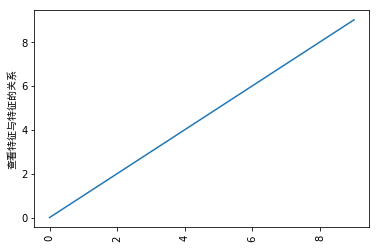

In [22]:
plt.plot(range(10))
plt.xticks(rotation=90)
plt.ylabel(u'查看特征与特征的关系', fontproperties=heiti)
plt.show()

In [5]:
class Plot_scatter(object):
    """查看特征与特征的关系
    
    传入参数i,j(int)为特征对应某列的索引号"""
    
    
    def __init__(self, i, j):
        """导入i,j对应的特征"""
        data_path = '../data/project_2'
        train_path = os.path.join(data_path, 'train.csv')
        self.tmp = pd.read_csv(train_path,usecols=[i,j])
        self.name_i = self.tmp.columns[0]
        self.name_j = self.tmp.columns[1]
        self.counts_i = self.tmp[self.name_i].value_counts()
        #self.counts__i_len = self.counts_i.shape[0]
        self.counts_j = self.tmp[self.name_j].value_counts()
        #self.counts__j_len = self.counts_j.shape[0]
        

        print('-----------------------------------')

        index = self.tmp[self.name_i].isin(self.counts_i[:12].index)\
              & self.tmp[self.name_j].isin(self.counts_j[:12].index)
        self.tmp = self.tmp[index]
        
        plt.scatter(x=self.tmp[self.name_i], y=self.tmp[self.name_j], alpha=0.01, c='b')
        plt.title('特征[{0}]与[{1}]的图像为:'.format(self.name_i, self.name_j), 
                  fontproperties=heiti)
        plt.xticks(rotation=45)
        plt.xlabel(self.name_i)
        plt.ylabel(self.name_j)
        plt.show()



-----------------------------------


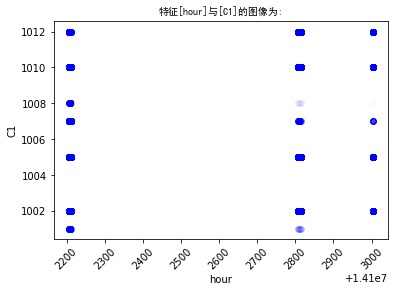

-----------------------------------


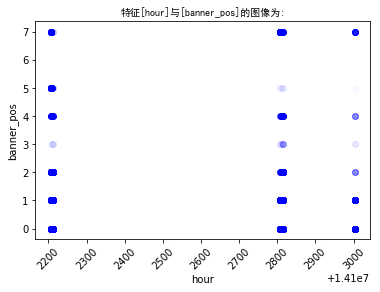

-----------------------------------


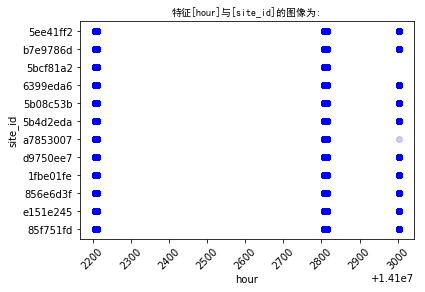

-----------------------------------


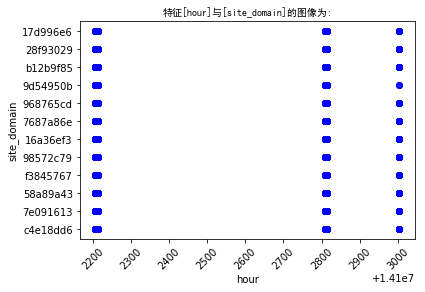

-----------------------------------


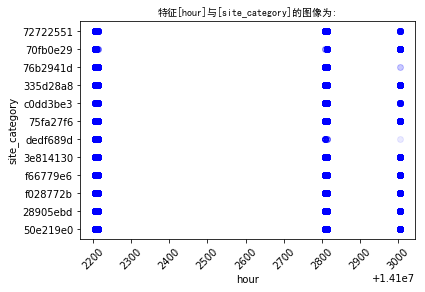

-----------------------------------


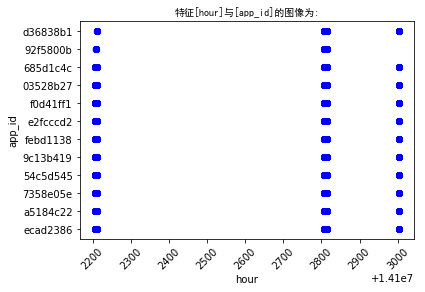

-----------------------------------


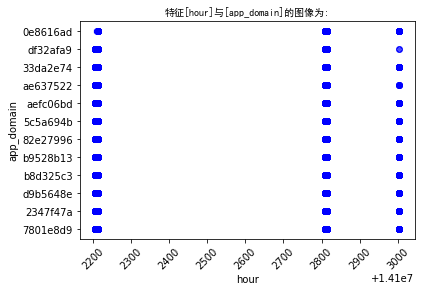

-----------------------------------


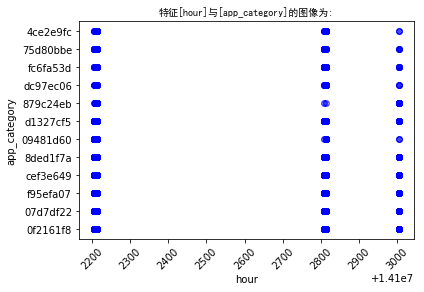

-----------------------------------


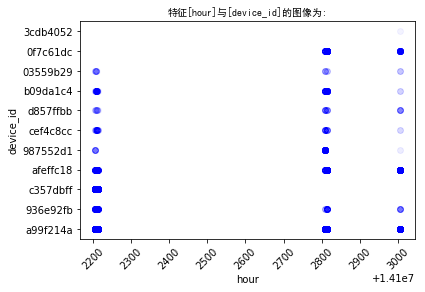

-----------------------------------


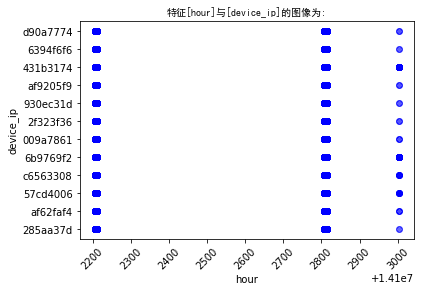

-----------------------------------


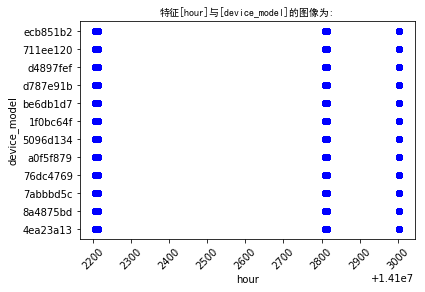

-----------------------------------


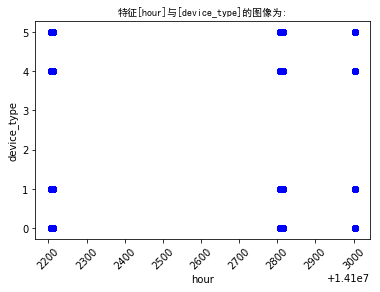

-----------------------------------


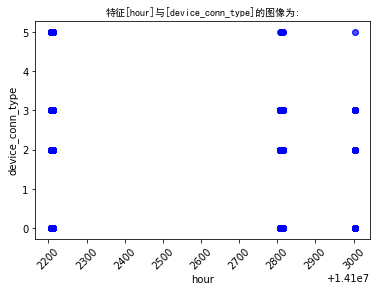

-----------------------------------


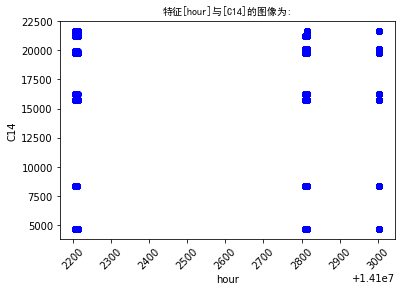

-----------------------------------


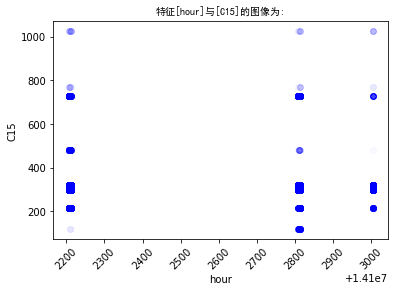

-----------------------------------


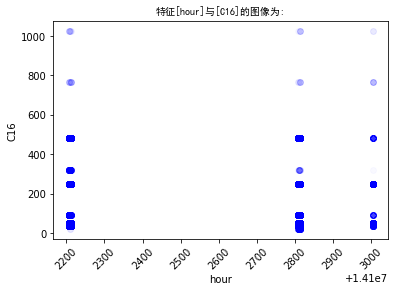

-----------------------------------


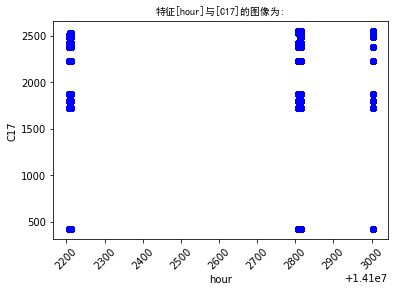

-----------------------------------


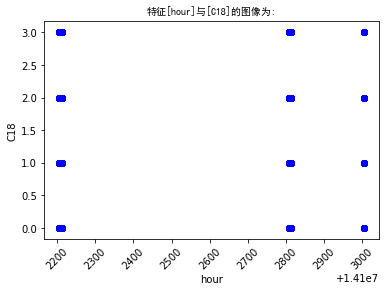

-----------------------------------


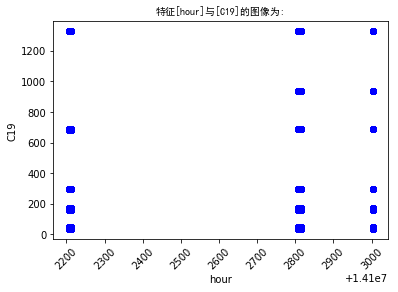

-----------------------------------


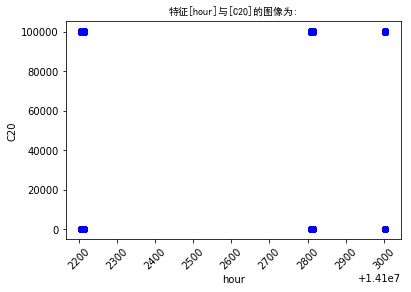

-----------------------------------


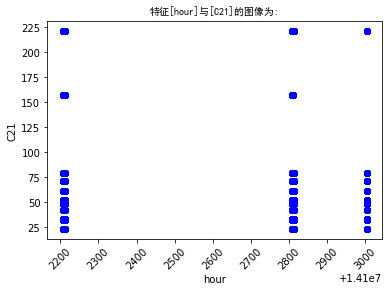

In [31]:
i = 2
for j in range(2, 24):
    if j==i: continue
    Plot_scatter(i,j)
    gc.collect()

-----------------------------------


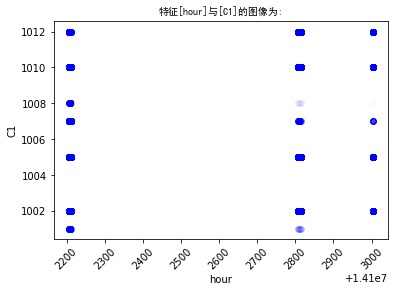

-----------------------------------


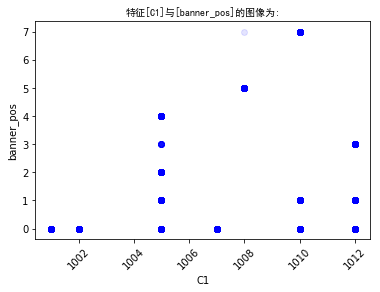

-----------------------------------


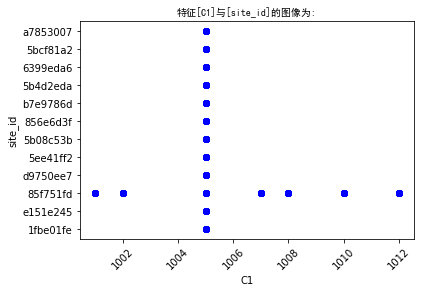

-----------------------------------


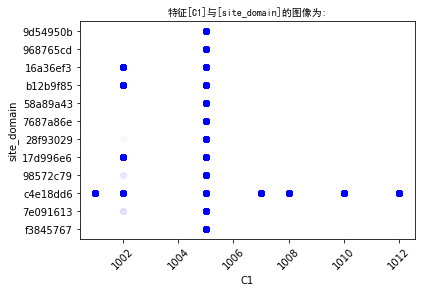

-----------------------------------


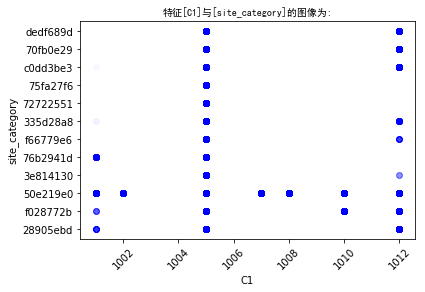

-----------------------------------


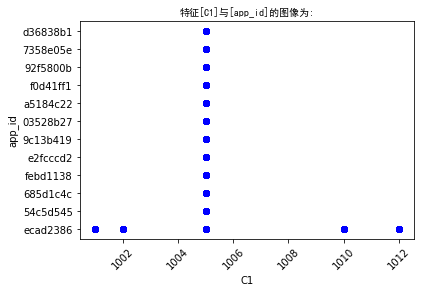

-----------------------------------


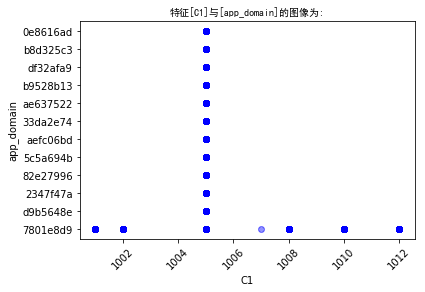

-----------------------------------


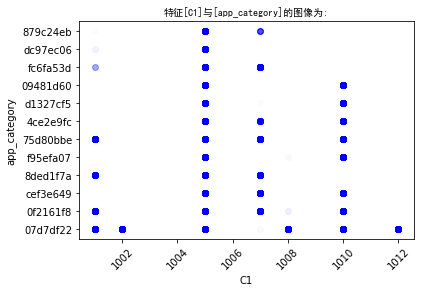

-----------------------------------


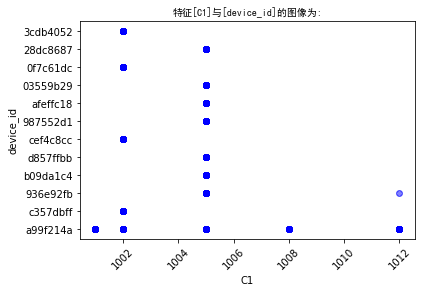

-----------------------------------


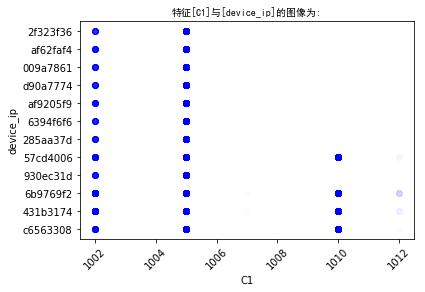

-----------------------------------


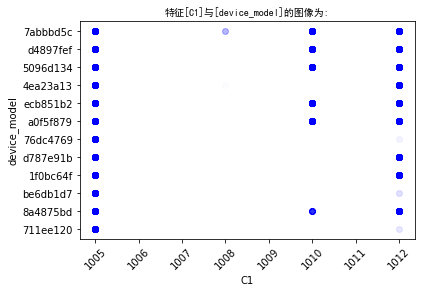

-----------------------------------


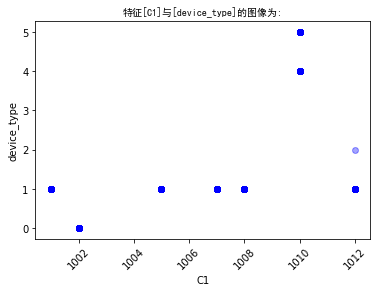

-----------------------------------


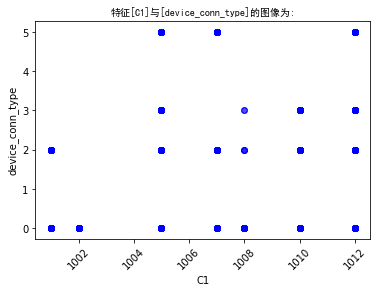

-----------------------------------


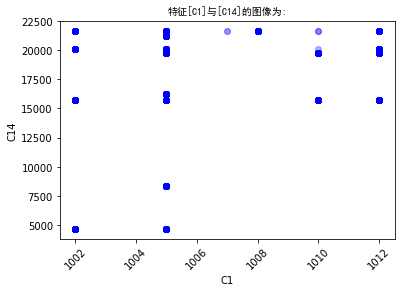

-----------------------------------


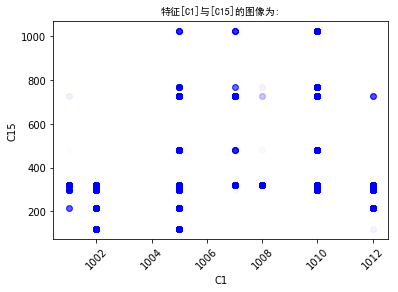

-----------------------------------


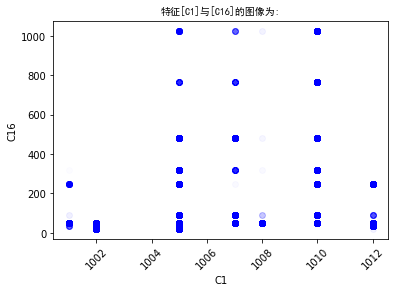

-----------------------------------


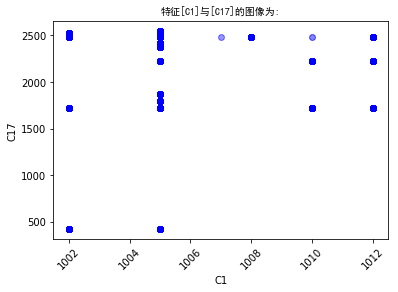

-----------------------------------


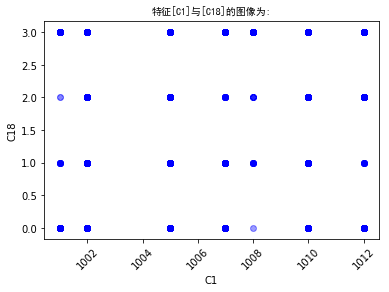

-----------------------------------


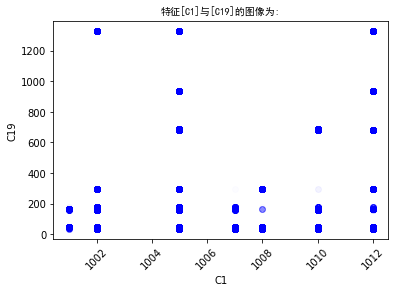

-----------------------------------


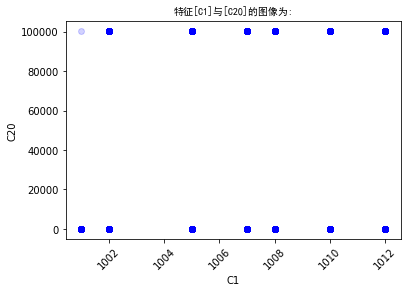

-----------------------------------


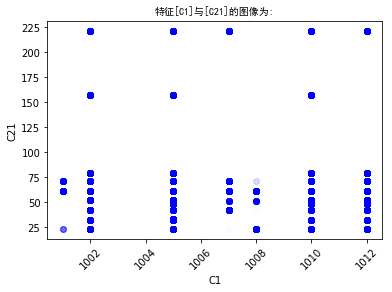

In [15]:
i = 3
for j in range(2, 24):
    if j==i: continue
    Plot_scatter(i,j)
    gc.collect()

-----------------------------------


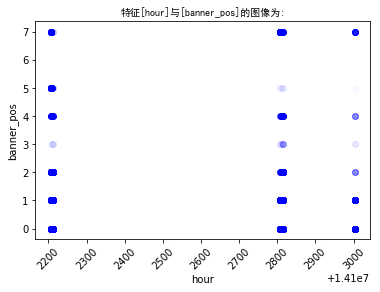

-----------------------------------


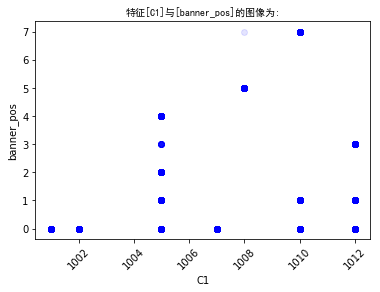

-----------------------------------


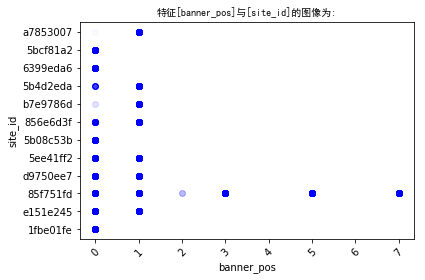

-----------------------------------


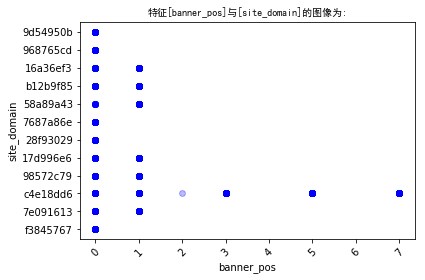

-----------------------------------


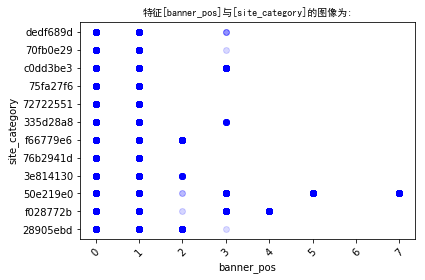

-----------------------------------


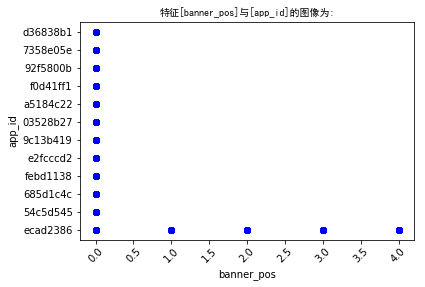

-----------------------------------


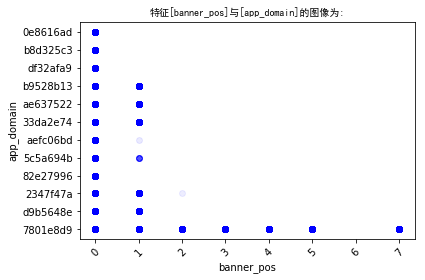

-----------------------------------


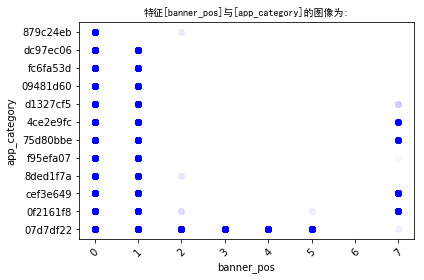

-----------------------------------


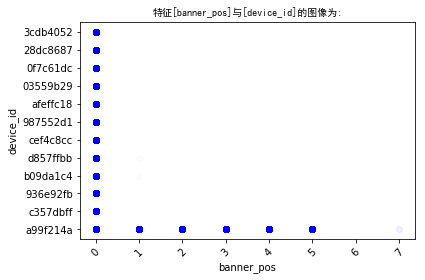

-----------------------------------


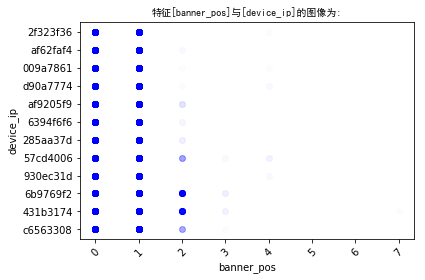

-----------------------------------


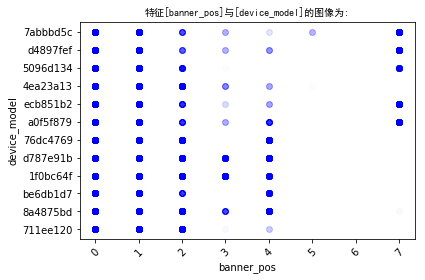

-----------------------------------


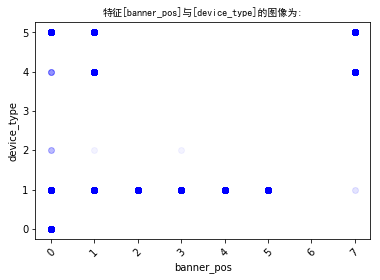

-----------------------------------


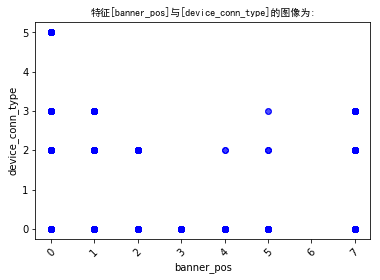

-----------------------------------


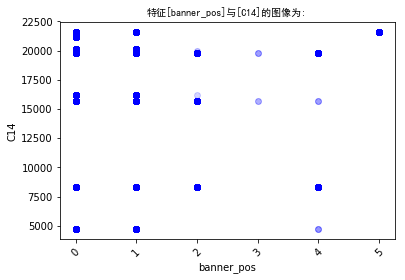

-----------------------------------


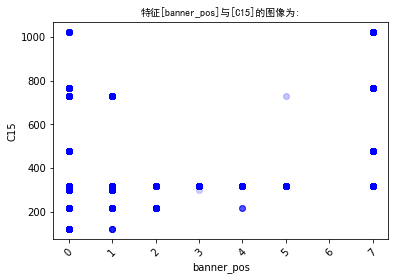

-----------------------------------


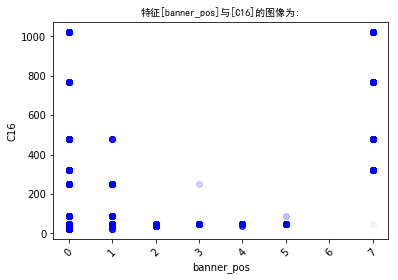

-----------------------------------


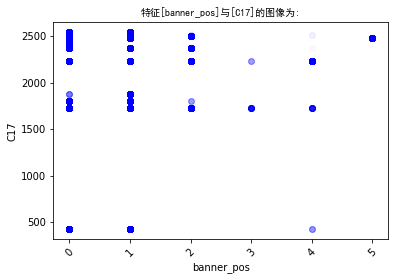

-----------------------------------


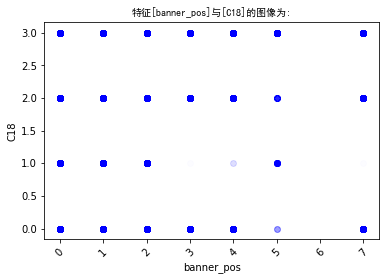

-----------------------------------


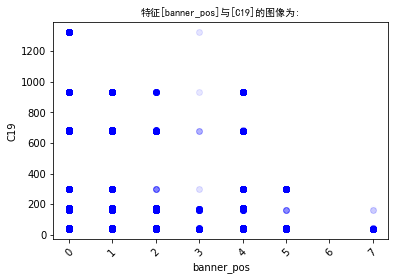

-----------------------------------


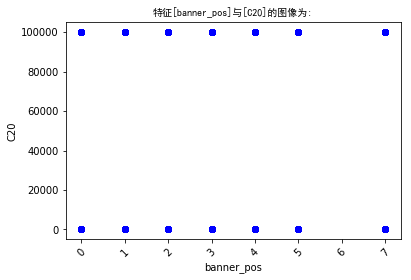

-----------------------------------


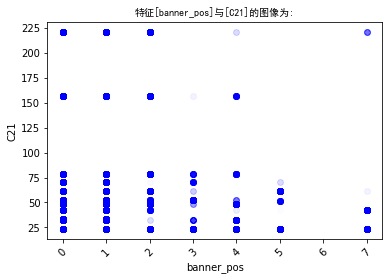

In [6]:
i = 4
for j in range(2, 24):
    if j==i: continue
    Plot_scatter(i,j)
    gc.collect()

-----------------------------------


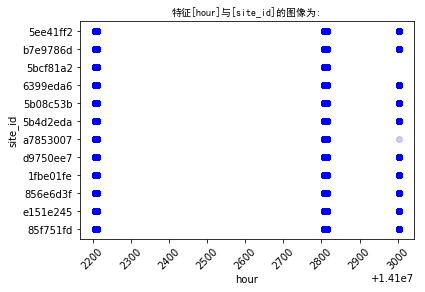

-----------------------------------


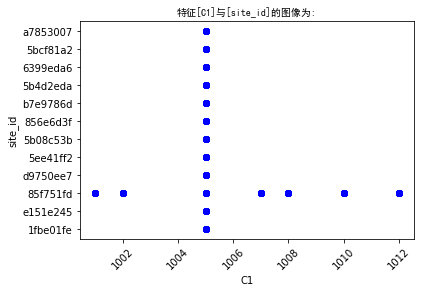

-----------------------------------


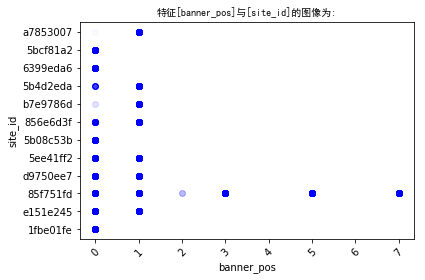

-----------------------------------


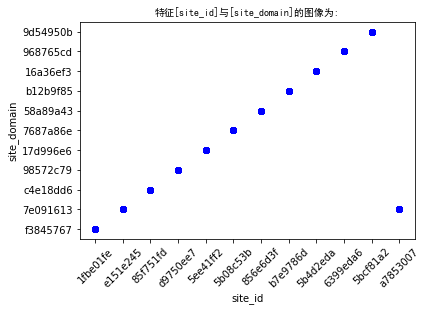

-----------------------------------


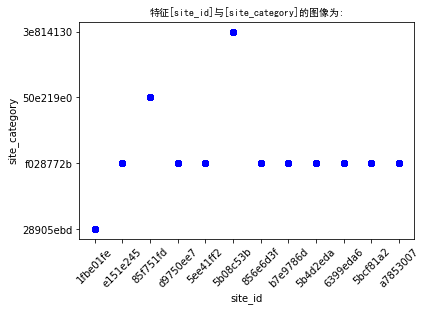

-----------------------------------


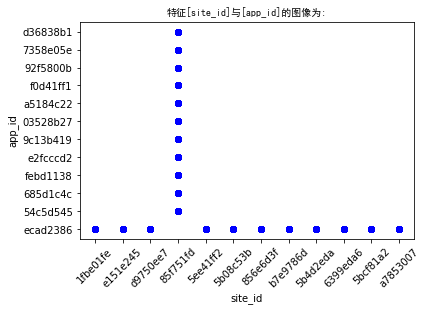

-----------------------------------


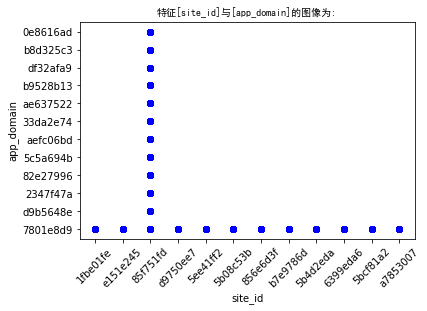

-----------------------------------


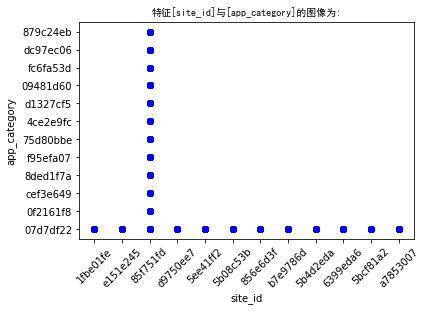

-----------------------------------


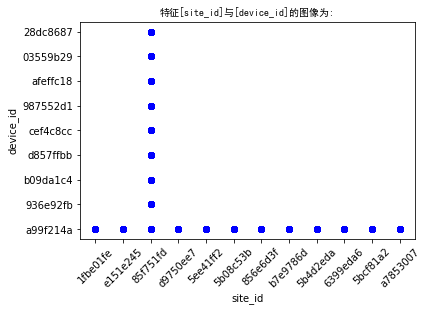

-----------------------------------


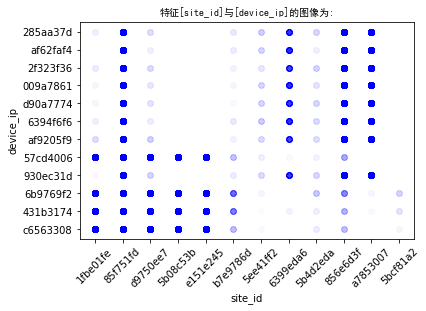

-----------------------------------


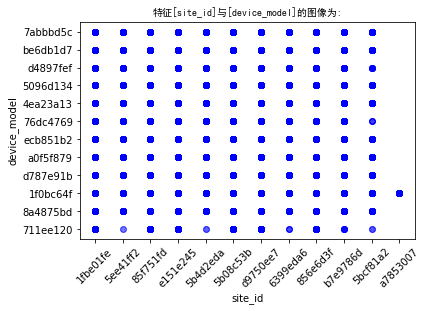

-----------------------------------


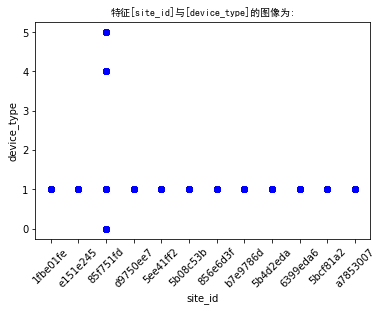

-----------------------------------


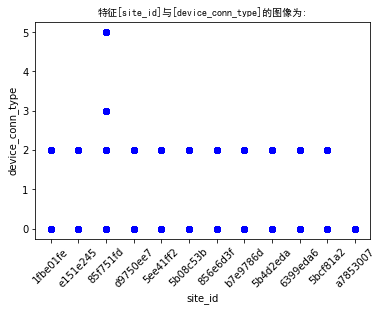

-----------------------------------


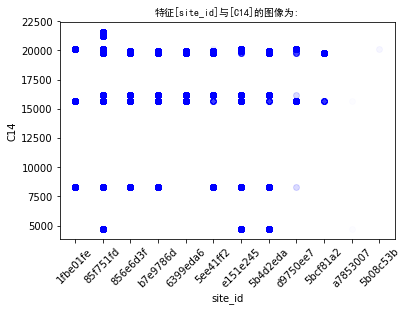

-----------------------------------


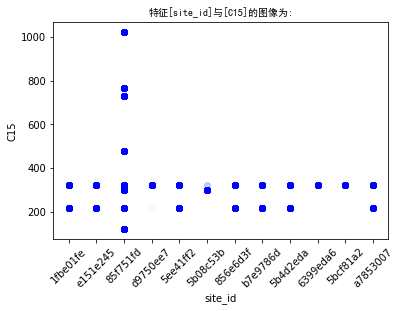

-----------------------------------


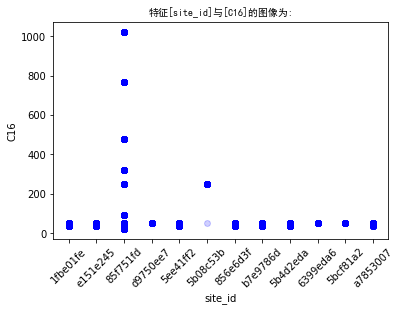

-----------------------------------


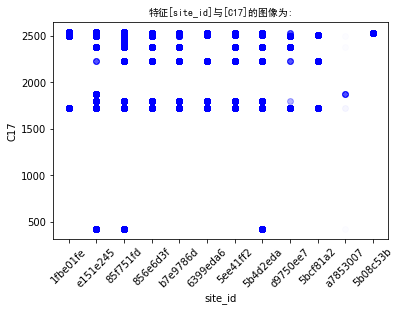

-----------------------------------


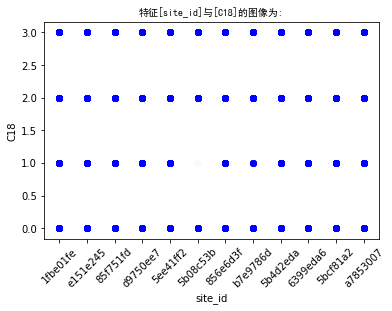

-----------------------------------


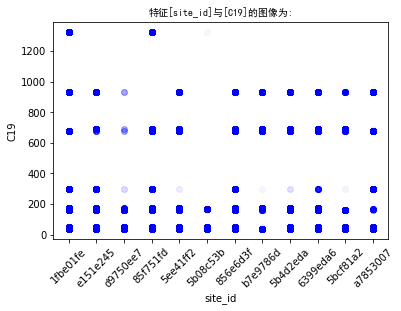

-----------------------------------


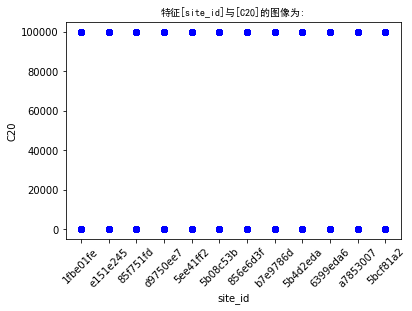

-----------------------------------


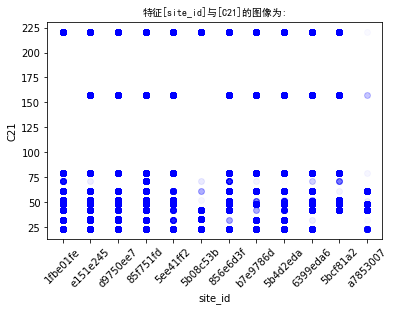

In [7]:
i = 5
for j in range(2, 24):
    if j==i: continue
    Plot_scatter(i,j)
    gc.collect()

In [ ]:
site_id和site_domain有很强的相关性,
创建新特征, 字符串相加

-----------------------------------


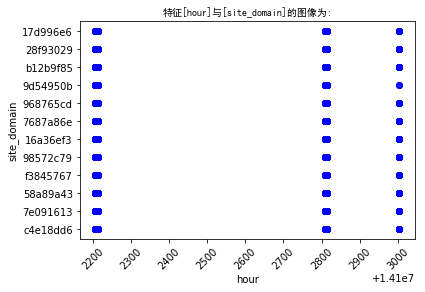

-----------------------------------


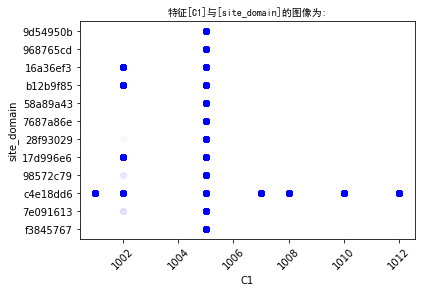

-----------------------------------


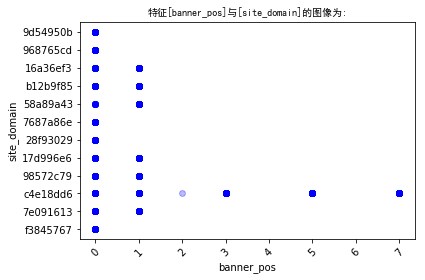

-----------------------------------


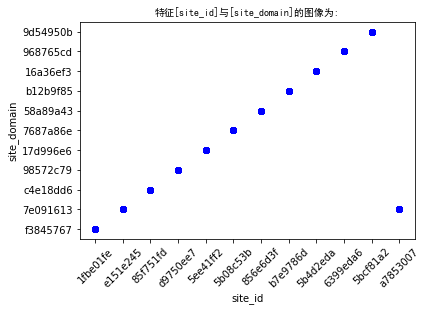

-----------------------------------


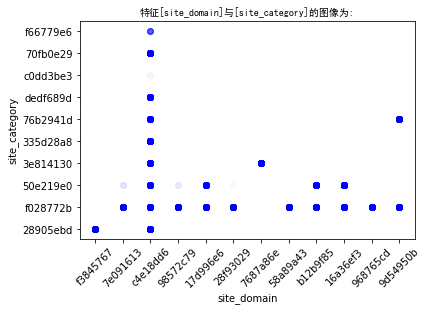

-----------------------------------


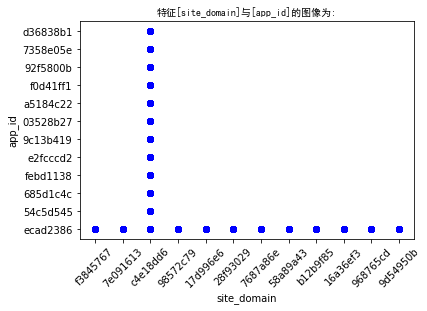

-----------------------------------


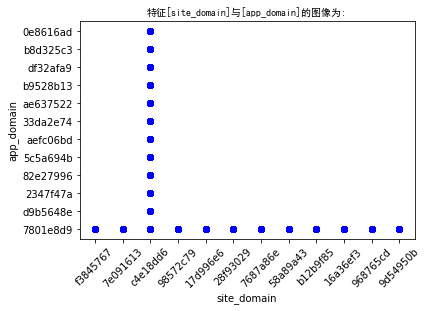

-----------------------------------


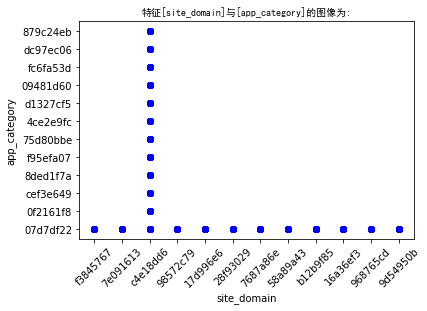

-----------------------------------


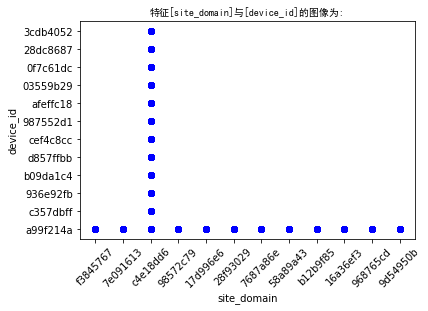

-----------------------------------


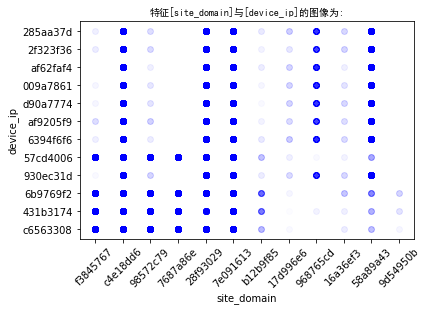

-----------------------------------


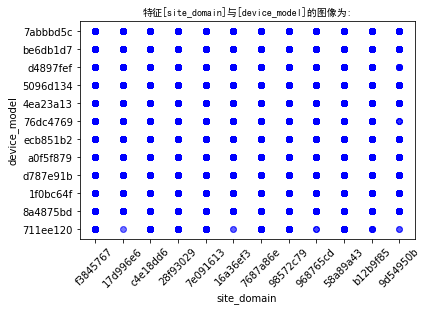

-----------------------------------


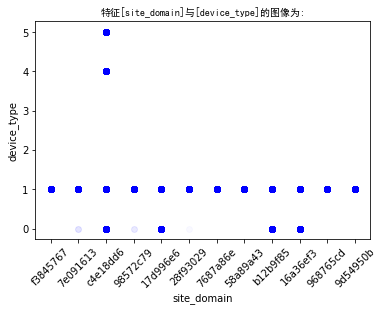

-----------------------------------


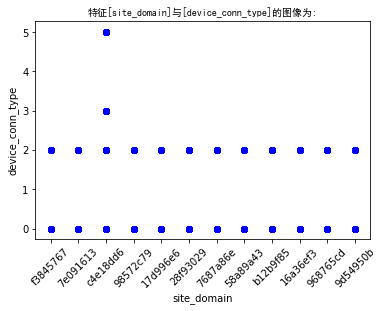

-----------------------------------


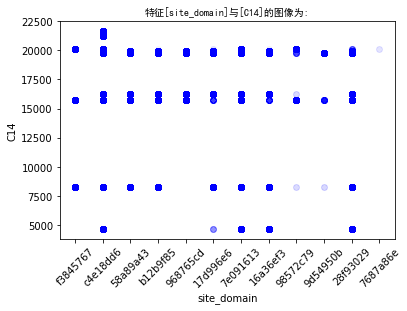

-----------------------------------


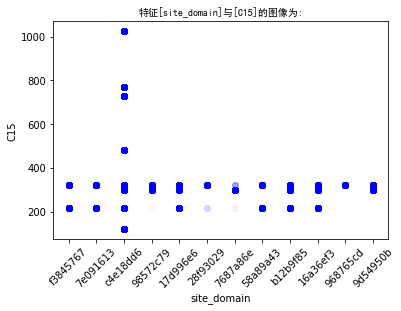

-----------------------------------


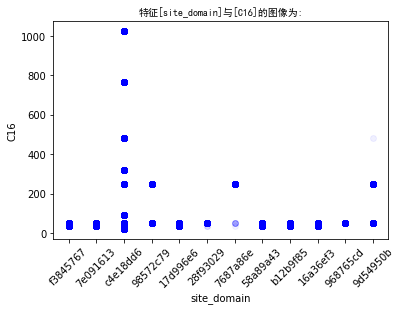

-----------------------------------


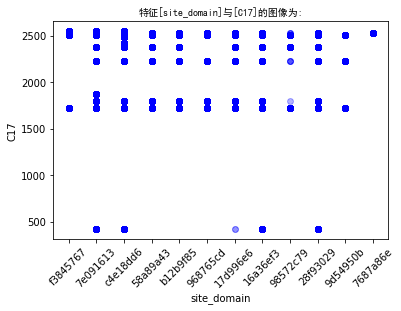

-----------------------------------


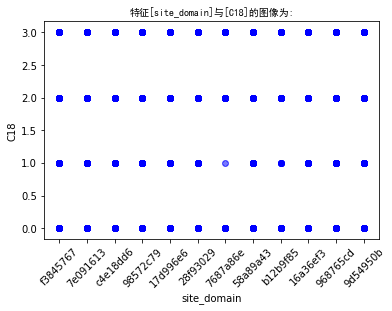

-----------------------------------


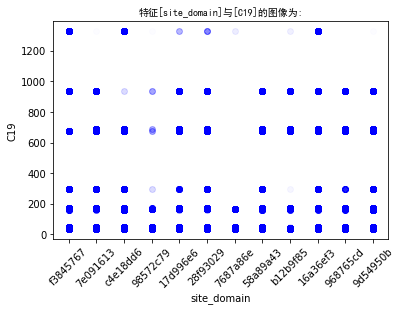

-----------------------------------


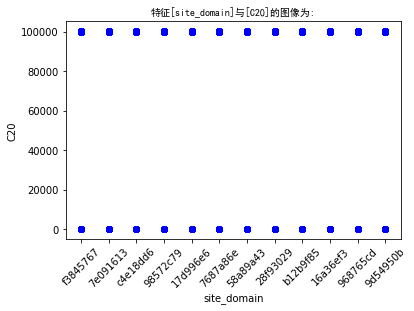

-----------------------------------


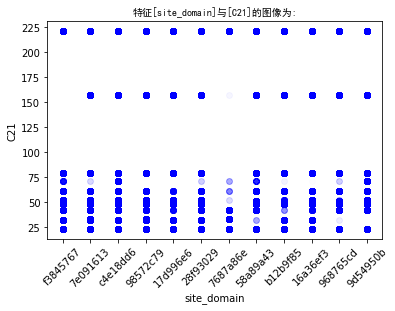

In [8]:
i = 6
for j in range(2, 24):
    if j==i: continue
    Plot_scatter(i,j)
    gc.collect()

-----------------------------------


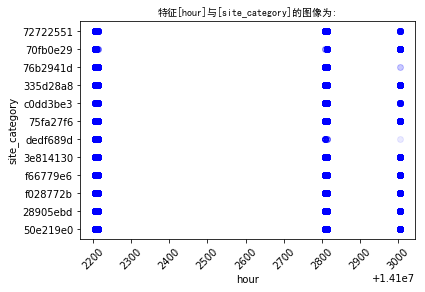

-----------------------------------


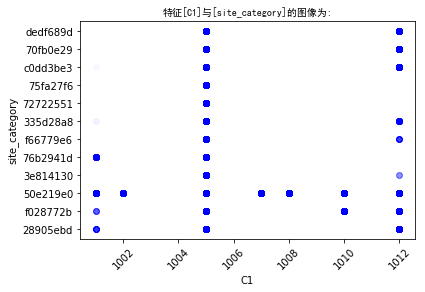

-----------------------------------


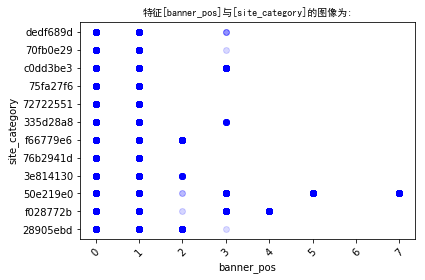

-----------------------------------


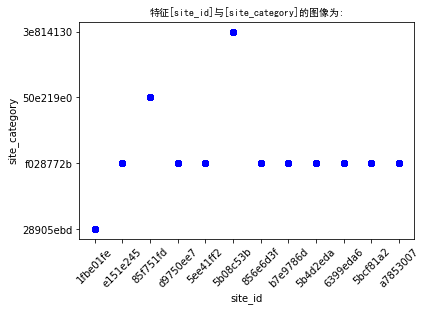

-----------------------------------


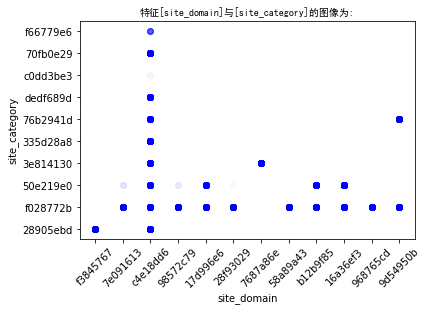

-----------------------------------


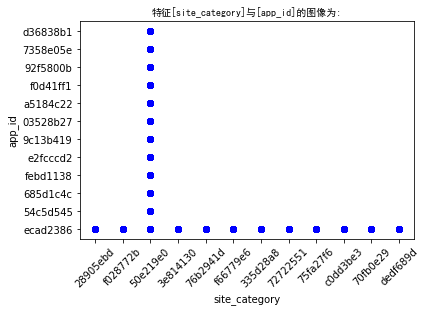

-----------------------------------


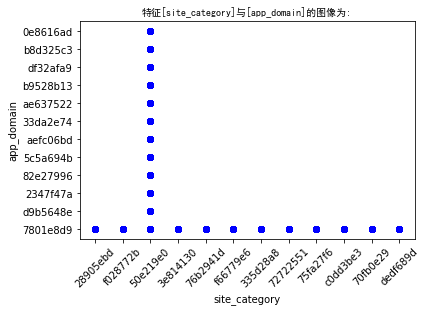

-----------------------------------


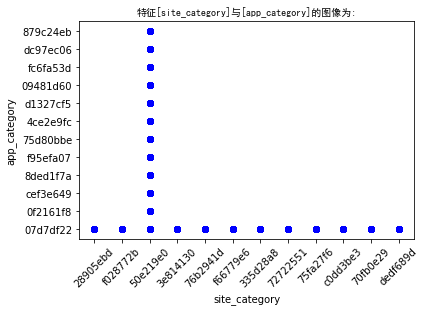

-----------------------------------


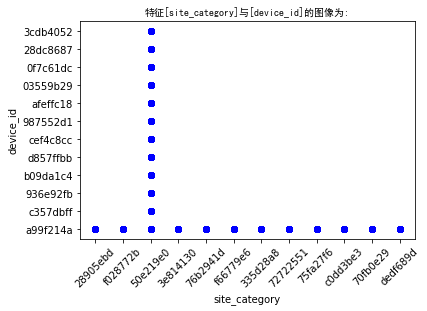

-----------------------------------


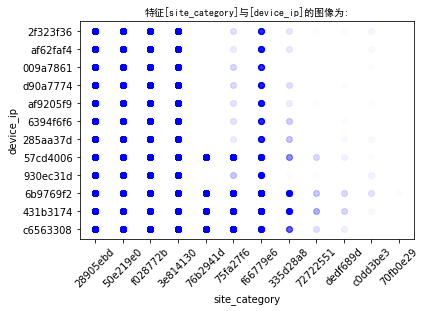

-----------------------------------


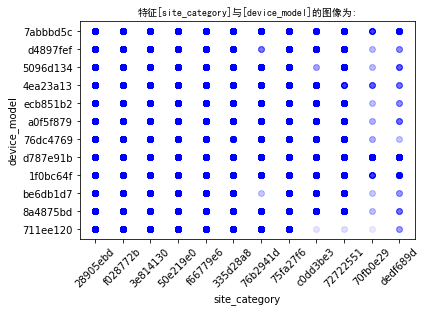

-----------------------------------


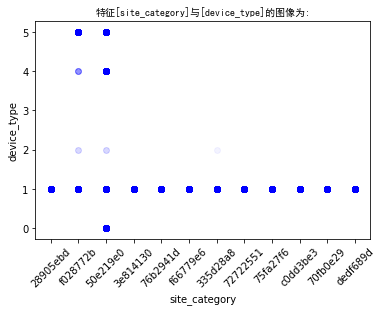

-----------------------------------


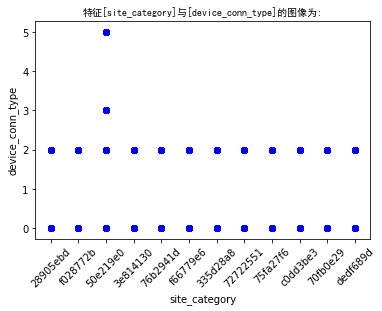

-----------------------------------


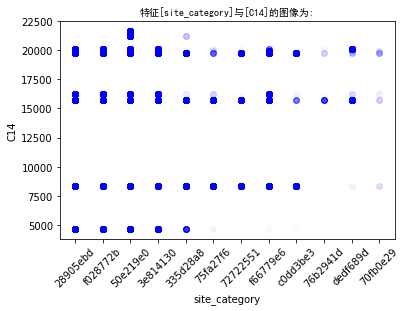

-----------------------------------


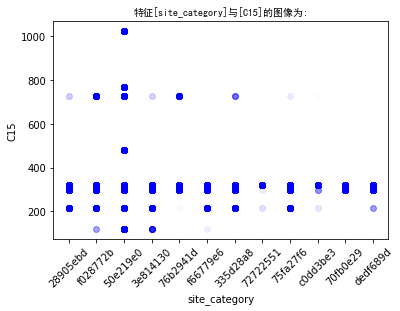

-----------------------------------


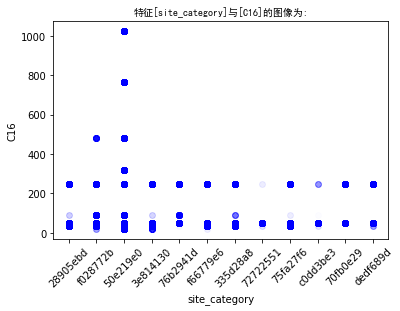

-----------------------------------


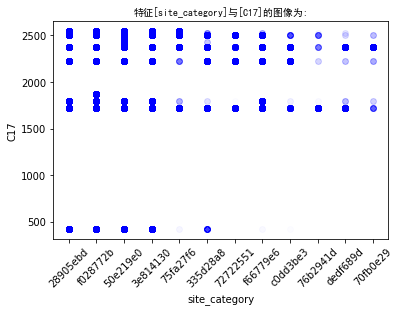

-----------------------------------


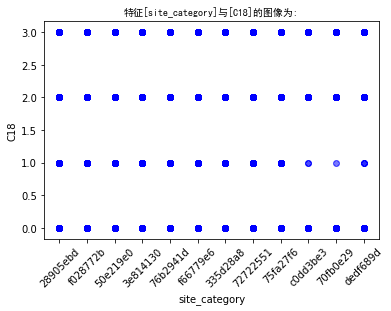

-----------------------------------


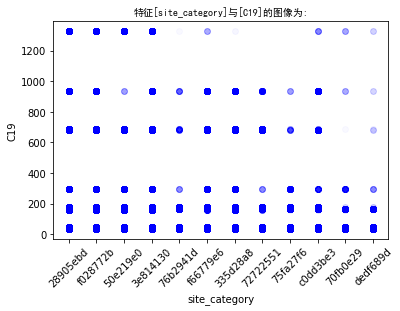

-----------------------------------


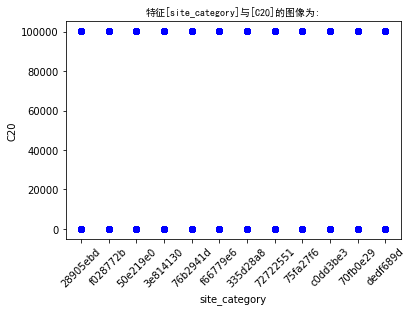

-----------------------------------


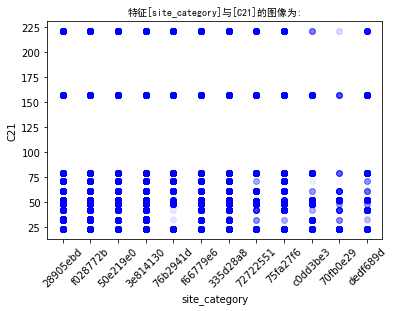

In [9]:
i = 7
for j in range(2, 24):
    if j==i: continue
    Plot_scatter(i,j)
    gc.collect()

## hour

In [6]:
#train = pd.read_csv(train_path, chunksize=10000000)
train_2 = pd.read_csv(train_path,usecols=[2])

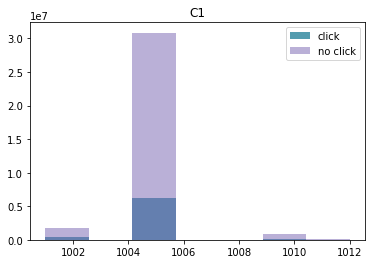

In [22]:
plot_y_X(train_1_3_4, 'C1', 7)

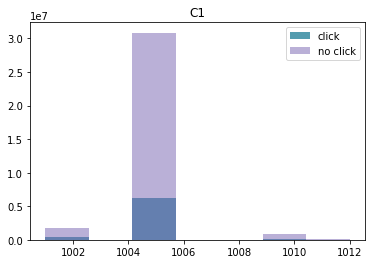

In [22]:
plot_y_X(train_1_3_4, 'C1', 7)

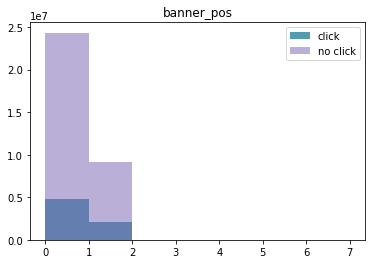

In [23]:
plot_y_X(train_1_3_4, 'banner_pos', 7)

In [16]:
train_3_4.isnull().sum()

C1            0
banner_pos    0
dtype: int64

'C1'和'banner_pos'都是7个分类,而且分布有点相似,查看一下散点图

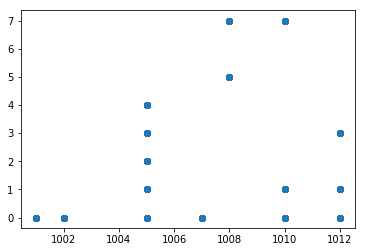

In [31]:
plt.scatter(train_1_3_4['C1'], train_1_3_4['banner_pos'])

In [5]:
C1_banner_pos = (train_1_3_4['C1']%1000)*(train_1_3_4['banner_pos']+1)

In [7]:
C1_banner_pos.value_counts()

5     26751661
10    10368501
2      2220812
20      859654
12       91975
80       43568
7        35304
24       19642
15       13001
1         9463
25        7704
48        7673
64           9
dtype: int64

(array([2.2302750e+06, 0.0000000e+00, 2.6751661e+07, 3.5304000e+04,
        1.0368501e+07, 9.1975000e+04, 0.0000000e+00, 1.3001000e+04,
        0.0000000e+00, 8.5965400e+05, 0.0000000e+00, 1.9642000e+04,
        7.7040000e+03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.6730000e+03,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.3568000e+04]),
 array([ 1.   ,  2.975,  4.95 ,  6.925,  8.9  , 10.875, 12.85 , 14.825,
        16.8  , 18.775, 20.75 , 22.725, 24.7  , 26.675, 28.65 , 30.625,
        32.6  , 34.575, 36.55 , 38.525, 40.5  , 42.475, 44.45 , 46.425,
        48.4  , 50.375, 52.35 , 54.325, 56.3  , 58.275, 60.25 , 62.225,
        64.2  , 66.175, 68.15 

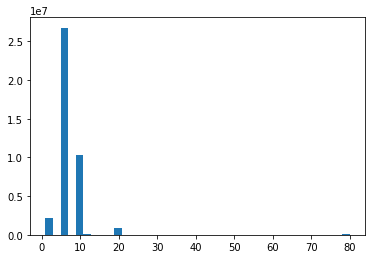

In [12]:
plt.hist(C1_banner_pos, bins=40)

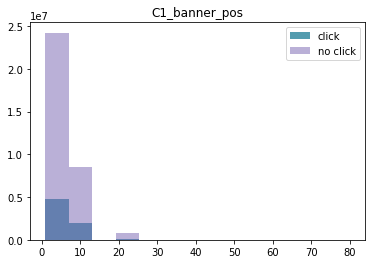

In [9]:
plot_y_X(train_1_3_4, 'C1_banner_pos', 13)

In [6]:
train_1_3_4.insert(loc=3, column='C1_banner_pos', value=C1_banner_pos)

In [13]:
del train_1_3_4, C1_banner_pos
gc.collect()

3843